<a href="https://colab.research.google.com/github/SYNX7007/Finalitics-Case-Project-Data-Analysis/blob/main/Finalitics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
file_path = '/content/online_advertising_performance_data.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data)

       month  day campaign_number user_engagement     banner placement  \
0      April    1          camp 1            High  160 x 600       abc   
1      April    1          camp 1            High  160 x 600       def   
2      April    1          camp 1            High  160 x 600       ghi   
3      April    1          camp 1            High  160 x 600       mno   
4      April    1          camp 1             Low  160 x 600       def   
...      ...  ...             ...             ...        ...       ...   
15403  April    1          camp 1             Low  160 x 600       ghi   
15404  April    1          camp 1             Low  160 x 600       mno   
15405   June   29          camp 1            High  800 x 250       ghi   
15406   June   29          camp 1            High  800 x 250       mno   
15407   June   29          camp 3            High  240 x 400       def   

       displays      cost  clicks   revenue  post_click_conversions  \
0             4    0.0060       0    0.0

#Start with data cleaning

In [ ]:
# Check for missing values
print(data.isnull().sum())

#Drop rows with any missing values
data_cleaned = data.dropna()

#Fill missing values with zeros
data_cleaned = data.fillna(0)

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64


In [ ]:
#Convert relevant columns to numeric types
numeric_columns = ['displays', 'cost', 'clicks', 'revenue', 'post_click_conversions', 'post_click_sales_amount']
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
# Reset index after cleaning
data_cleaned.reset_index(drop=True, inplace=True)
# Save cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [ ]:
data = pd.read_csv('/content/cleaned_data.csv')

print(data.head())
print(data.info())

   month  day campaign_number user_engagement     banner placement  displays  \
0  April    1          camp 1            High  160 x 600       abc         4   
1  April    1          camp 1            High  160 x 600       def     20170   
2  April    1          camp 1            High  160 x 600       ghi     14701   
3  April    1          camp 1            High  160 x 600       mno    171259   
4  April    1          camp 1             Low  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  \
0    0.0060       0    0.0000                       0   
1   26.7824     158   28.9717                      23   
2   27.6304     158   28.9771                      78   
3  216.8750    1796  329.4518                     617   
4    0.0670       1    0.1834                       0   

   post_click_sales_amount  Unnamed: 12  Unnamed: 13  
0                   0.0000          0.0          0.0  
1                1972.4602          0.0          0.0  
2          

#Q1) What is the overall trend in user engagement throughout the campain period

<Figure size 1200x600 with 0 Axes>

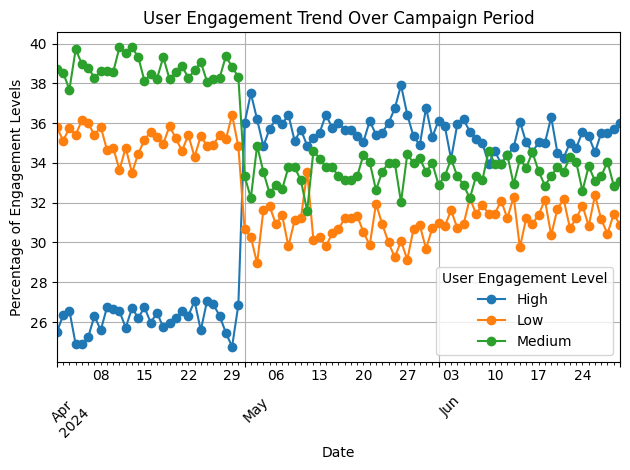

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('cleaned_data.csv')

# Creating a mapping for months to numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

#Converting month names to numbers
data['month'] = data['month'].map(month_mapping)

#Creating  a date column
data['date'] = pd.to_datetime(data[['month', 'day']].assign(year=2024))


engagement_trend = data.groupby(['date', 'user_engagement']).size().unstack(fill_value=0)
engagement_percentage = engagement_trend.div(engagement_trend.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
engagement_percentage.plot(kind='line', marker='o')
plt.title('User Engagement Trend Over Campaign Period')
plt.xlabel('Date')
plt.ylabel('Percentage of Engagement Levels')
plt.xticks(rotation=45)
plt.legend(title='User Engagement Level')
plt.tight_layout()
plt.grid()
plt.show()

Ans) The campaingn slowly becomes successful as more people are finding the campaign to be relevant.

#Q2) How does the size of the ad(banner) impact the number of clicks generated?

banner
728 x 90     3142
300 x 250    2820
240 x 400    2424
670 x 90     2352
468 x 60     1899
160 x 600    1803
580 x 400     606
800 x 250     357
Name: count, dtype: int64


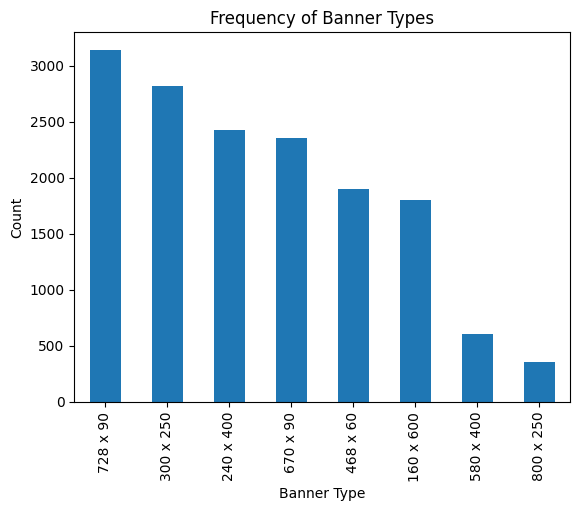

banner
160 x 600     239560
240 x 400    1113254
300 x 250     411214
468 x 60        1295
580 x 400     120681
670 x 90       37203
728 x 90      569606
800 x 250         12
Name: clicks, dtype: int64


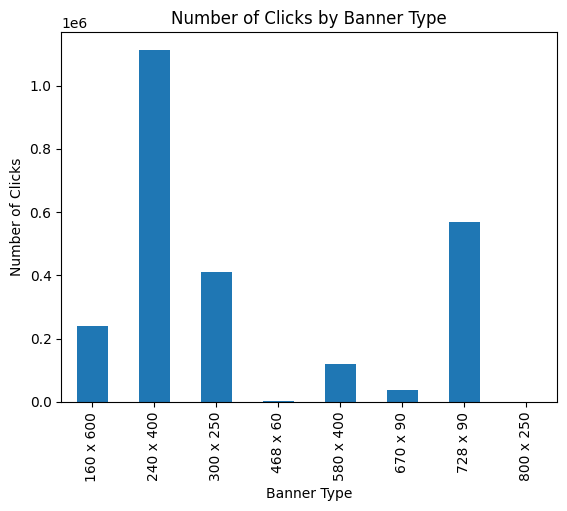

In [ ]:
banner_counts = data['banner'].value_counts()

print(banner_counts)
banner_counts.plot(kind='bar')
plt.title('Frequency of Banner Types')
plt.xlabel('Banner Type')
plt.ylabel('Count')
plt.show()

clicked_by_banner = data.groupby('banner')['clicks'].sum()
print(clicked_by_banner)
clicked_by_banner.plot(kind='bar')
plt.title('Number of Clicks by Banner Type')
plt.xlabel('Banner Type')
plt.ylabel('Number of Clicks')
plt.show()

#Q3)which Publisher spaces(placements) yielded the highest number of displays and clicks?

In [ ]:
#Grouping data by 'placement' and calculating total displays and clicks
placement_performance = data.groupby('placement')[['displays', 'clicks']].sum()

#Sorting placements by displays and clicks to find the top performers
top_displays = placement_performance['displays'].sort_values(ascending=False)
top_clicks = placement_performance['clicks'].sort_values(ascending=False)

top_displays.head(), top_clicks.head()


(placement
 mno    143159537
 ghi     59740398
 def     28176283
 jkl      7692732
 abc       242142
 Name: displays, dtype: int64,
 placement
 ghi    1247049
 mno     993029
 def     176095
 jkl      75063
 abc       1584
 Name: clicks, dtype: int64)

Ans)Highest Displays:

mno: 143,164,944 displays,
ghi: 59,740,415 displays,
def: 28,177,492 displays

Highest Clicks:

ghi: 1,247,049 clicks,
mno: 993,044 clicks,
def: 176,097 clicks

#Q4)Is there a correlation between the cost of serving ads and the revenue generated from clicks?

Correlation between cost and revenue: 0.7605169899114144


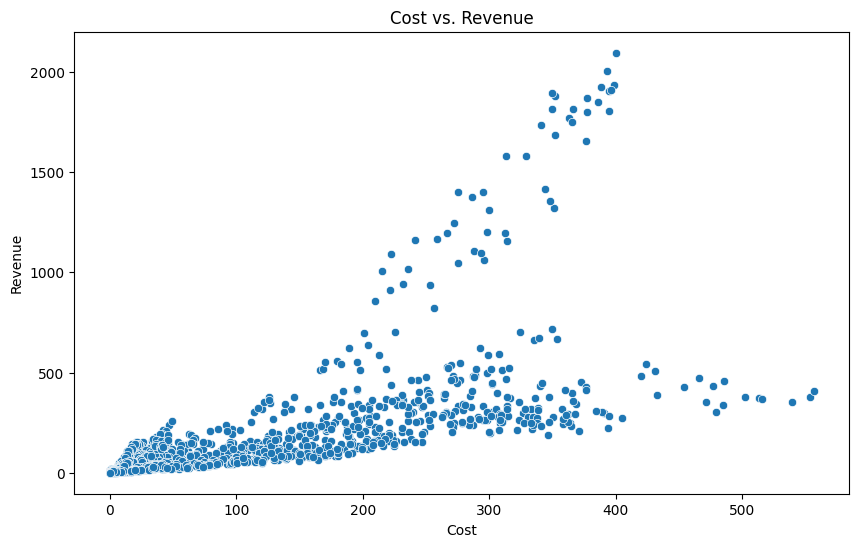

Pearson Correlation Coefficient: 0.7605169899114147
p-value: 0.0
There is a significant correlation between cost and revenue.


In [ ]:
data = pd.read_csv('cleaned_data.csv')
correlation = data['cost'].corr(data['revenue'])
print("Correlation between cost and revenue:", correlation)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='revenue', data=data)
plt.title('Cost vs. Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

pearson_corr, p_value = stats.pearsonr(data['cost'], data['revenue'])
print("Pearson Correlation Coefficient:", pearson_corr)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between cost and revenue.")
else:
    print("There is no significant correlation between cost and revenue.")


Ans)The correlation between the cost of serving ads and the revenue generated from clicks is approximately 0.76, indicating a strong positive relationship. Higher advertising costs are generally associated with higher revenues.

#Q5)What is the average revenue generated per click for Company X during the campaign period?

In [ ]:
#Total revenue and total clicks
total_revenue = data['revenue'].sum()
total_clicks = data['clicks'].sum()

#Average revenue per click
average_revenue_per_click = total_revenue / total_clicks if total_clicks > 0 else 0
total_revenue, total_clicks, average_revenue_per_click
print("The total revenue is: ",total_revenue,"The total Clicks: ",total_clicks,"Avg revenue per Clicks:",average_revenue_per_click)


The total revenue is:  276262.6159 The total Clicks:  2492825 Avg revenue per Clicks: 0.1108231086819171


#Q6)Which campaigns had the highest post-click conversion rates?

In [ ]:
data = pd.read_csv('cleaned_data.csv')
data = data[data['clicks'] != 0].copy()
data['conversion_rate'] = data['post_click_conversions'] / data['clicks']

top_campaigns = data.sort_values(by='conversion_rate', ascending=False)

print("Top campaigns by conversion rate:")
print(top_campaigns[['campaign_number', 'conversion_rate']].head())

Top campaigns by conversion rate:
      campaign_number  conversion_rate
11491          camp 1             16.0
13354          camp 1              9.0
14621          camp 1              9.0
14742          camp 1              9.0
7674           camp 1              8.0


Ans) Campaign 11491 from "camp 1" has the highest post-click conversion rate at 16%, followed by others in the same campaign with rates of 9% and 8%.

#Q7)Are there any specific trends or patterns in post-click sales amounts over time?

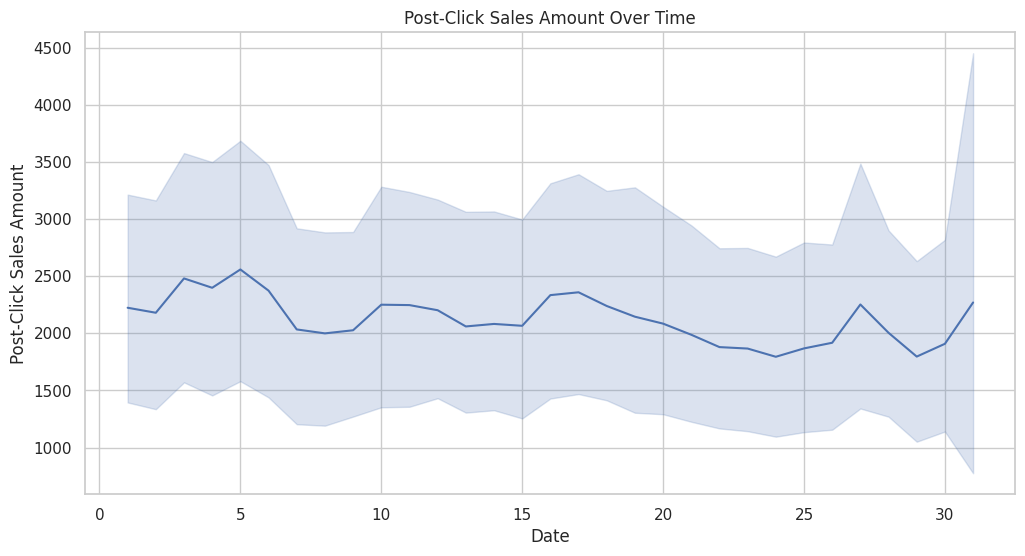

In [ ]:
data.set_index('day', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data['post_click_sales_amount'])
plt.title('Post-Click Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Post-Click Sales Amount')
plt.show()

Ans)The post-click sales amounts show some fluctuation over time, with a general consistency in the middle period and a noticeable spike toward the end. The shaded area suggests variability, with larger deviations occurring at specific points.

#Q8)How does the level of user engagement vary across different banner sizes?

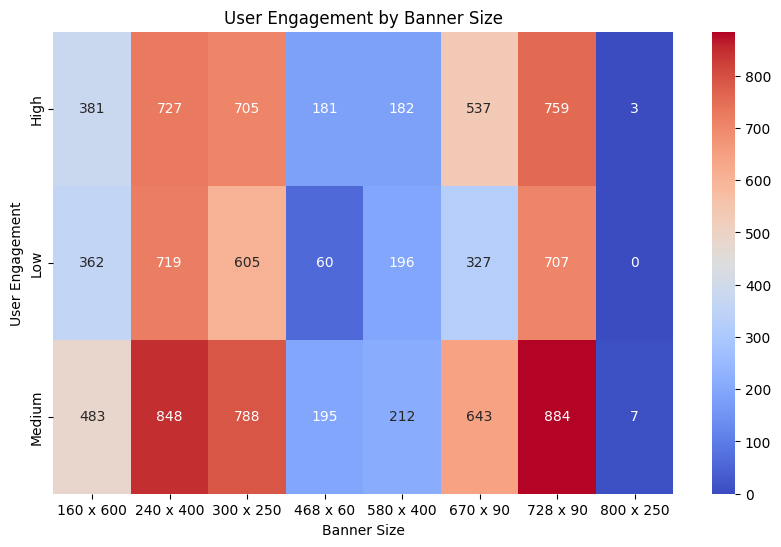

In [ ]:
cross_tab = pd.crosstab(data['user_engagement'], data['banner'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('User Engagement by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('User Engagement')
plt.show()

Ans)User engagement varies significantly across banner sizes, with the 240 x 400 and 728 x 90 banners showing the highest engagement, particularly for medium engagement levels. Smaller banners like 468 x 60 tend to have lower engagement overall.

#Q9)Which placement types result in the highest post-click conversion rates?

In [ ]:
data = data[data['clicks'] != 0].copy()

data['conversion_rate'] = data['post_click_conversions'] / data['clicks']

# Grouping the data by placement and calculate the average conversion rate
placement_conversion_rates = data.groupby('placement')['conversion_rate'].mean().reset_index()

# Sorting the placements by conversion rate in descending order
top_placements = placement_conversion_rates.sort_values(by='conversion_rate', ascending=False)

print("Top placements by conversion rate:")
print(top_placements)

Top placements by conversion rate:
  placement  conversion_rate
1       abc         0.301971
4       jkl         0.224332
3       ghi         0.187649
5       mno         0.182309
2       def         0.152488
0         0         0.000000


Ans) The “abc” placement type has the highest conversion rate

#Q10)Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

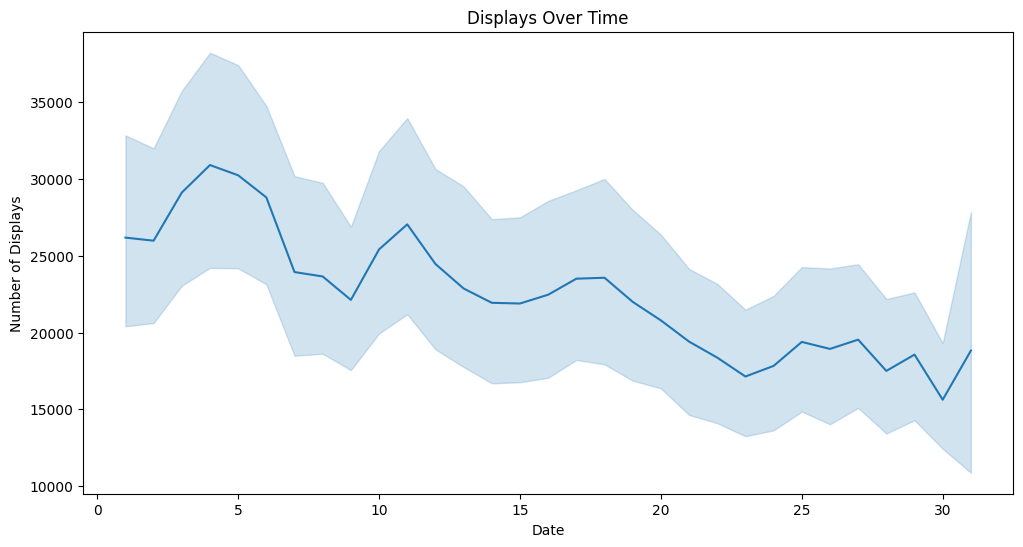

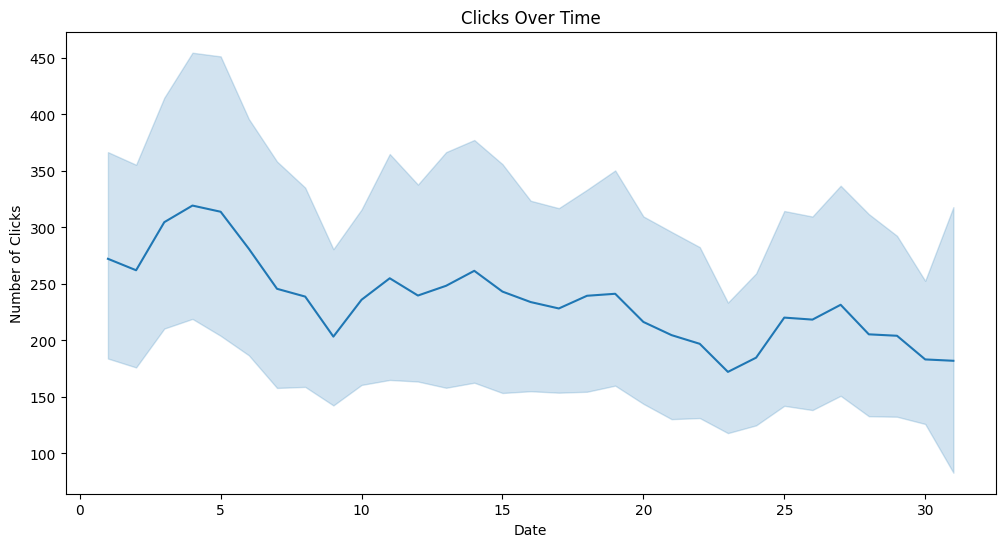

In [ ]:
#Display over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['displays'])
plt.title('Displays Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Displays')
plt.show()

#Clicks over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['clicks'])
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.show()

Ans) It shows that both clicks and displays exhibit a declining trend throughout the campaign period. Initially, there is a noticeable peak in both metrics, followed by a steady decrease. Displays experience a sharper decline, which might indicate factors such as reduced ad exposure, budget limitations, or audience fatigue.

Clicks, while following a similar pattern, stabilize after the initial drop, implying that user engagement remains relatively consistent despite fewer impressions. Peaks and troughs in both graphs align, highlighting a strong correlation between displays and clicks, where higher impressions generally lead to more user interactions.

This suggests engagement is directly tied to visibility.

#Q11)Is there a correlation between user engagement levels and the revenue generated?

Correlation between user engagement and revenue: 0.1754517422852603


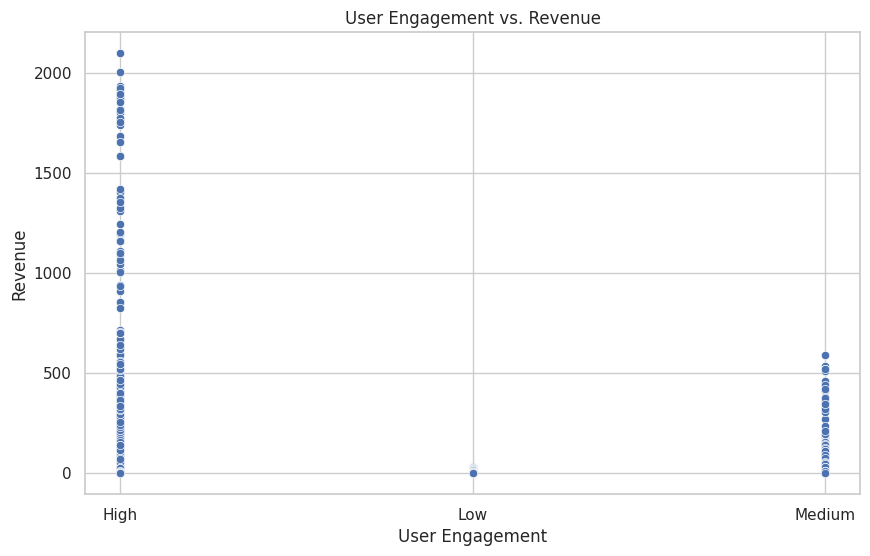

Pearson Correlation Coefficient: 0.17545174228526075
p-value: 9.933960595236463e-107
There is a significant correlation between user engagement and revenue.


In [ ]:
# Numerical Transformation
data['engagement_level'] = data['user_engagement'].map({'Low': 1, 'Medium': 2, 'High': 3})

correlation = data['engagement_level'].corr(data['revenue'])
print("Correlation between user engagement and revenue:", correlation)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_engagement', y='revenue', data=data)
plt.title('User Engagement vs. Revenue')
plt.xlabel('User Engagement')
plt.ylabel('Revenue')
plt.show()


pearson_corr, p_value = stats.pearsonr(data['engagement_level'], data['revenue'])
print("Pearson Correlation Coefficient:", pearson_corr)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between user engagement and revenue.")
else:
    print("There is no significant correlation between user engagement and revenue.")

Ans)The data suggests that while there is a positive relationship between user engagement and revenue, it's not a very strong one.

#Q12)Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

In [ ]:
data = pd.read_csv('/content/cleaned_data.csv')
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for cost, clicks, and revenue
cost_outliers = detect_outliers(data, 'cost')
clicks_outliers = detect_outliers(data, 'clicks')
revenue_outliers = detect_outliers(data, 'revenue')

# Display the outliers
print("Cost Outliers:")
print(cost_outliers)

print("\nClicks Outliers:")
print(clicks_outliers)

print("\nRevenue Outliers:")
print(revenue_outliers)

Cost Outliers:
       month  day campaign_number user_engagement     banner placement  \
1      April    1          camp 1            High  160 x 600       def   
2      April    1          camp 1            High  160 x 600       ghi   
3      April    1          camp 1            High  160 x 600       mno   
9      April    1          camp 1          Medium  160 x 600       mno   
10     April    1          camp 1            High  240 x 400       def   
...      ...  ...             ...             ...        ...       ...   
15320   June   30          camp 1            High   728 x 90       ghi   
15322   June   30          camp 1            High   728 x 90       mno   
15331   June   30          camp 1          Medium   728 x 90       ghi   
15337   June   30          camp 3            High  240 x 400       ghi   
15352   June   30          camp 3            High  300 x 250       mno   

       displays      cost  clicks   revenue  post_click_conversions  \
1         20170   26.7824

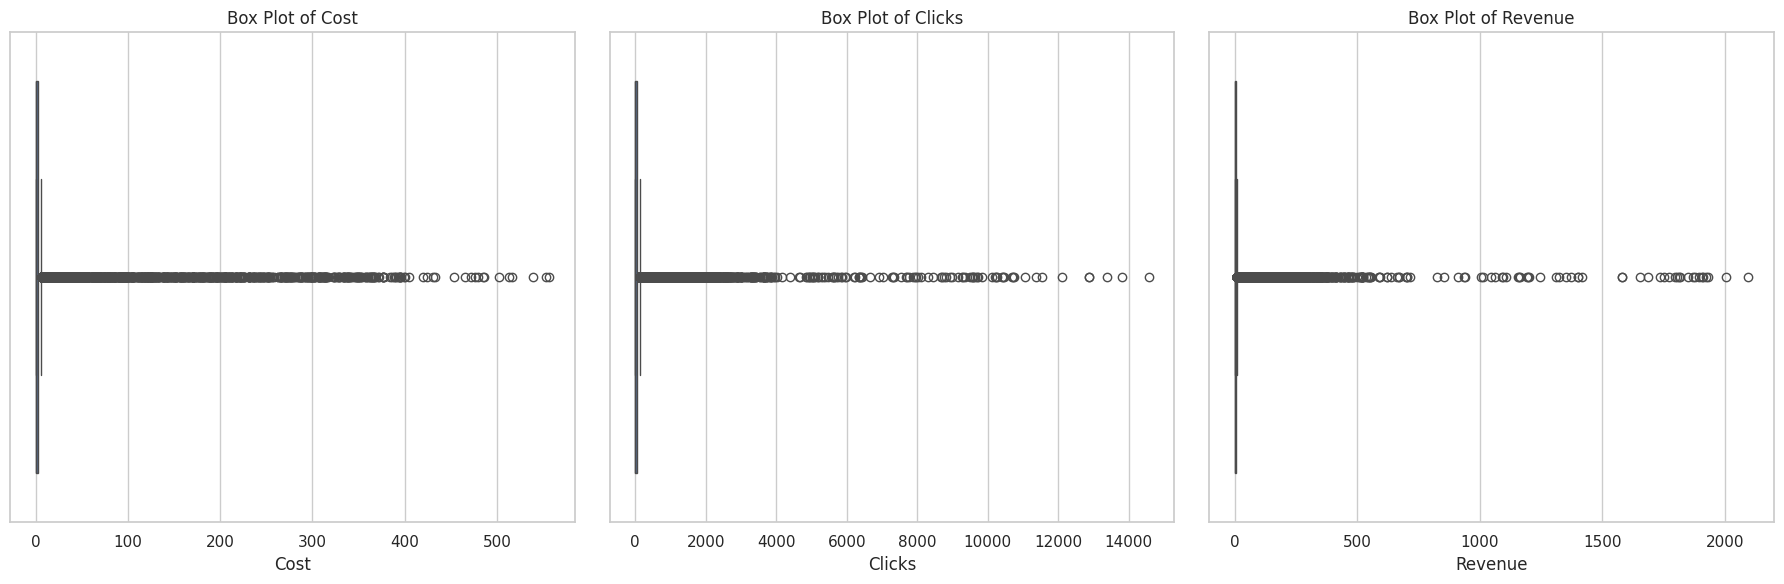

In [ ]:
sns.set(style="whitegrid")

# Create a figure with subplots for cost, clicks, and revenue
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Cost
sns.boxplot(ax=axes[0], x=data['cost'])
axes[0].set_title('Box Plot of Cost')
axes[0].set_xlabel('Cost')

# Box plot for Clicks
sns.boxplot(ax=axes[1], x=data['clicks'])
axes[1].set_title('Box Plot of Clicks')
axes[1].set_xlabel('Clicks')

# Box plot for Revenue
sns.boxplot(ax=axes[2], x=data['revenue'])
axes[2].set_title('Box Plot of Revenue')
axes[2].set_xlabel('Revenue')


plt.tight_layout()
plt.show()

Cost: The box plot for cost indicates a significant number of outliers above the upper whisker.  

Clicks: Similarly, the clicks box plot shows many outliers far above the upper whisker, representing campaigns or instances with unusually high click counts. These might indicate very successful campaigns  

Revenue: The revenue box plot also has a notable number of outliers above the upper whisker, reflecting instances of high revenue.

#Q13)How does the effectiveness of campaigns vary based on the size of the ad and placement type?

<ipython-input-21-a72e83b7ffe1>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(values='clicks',


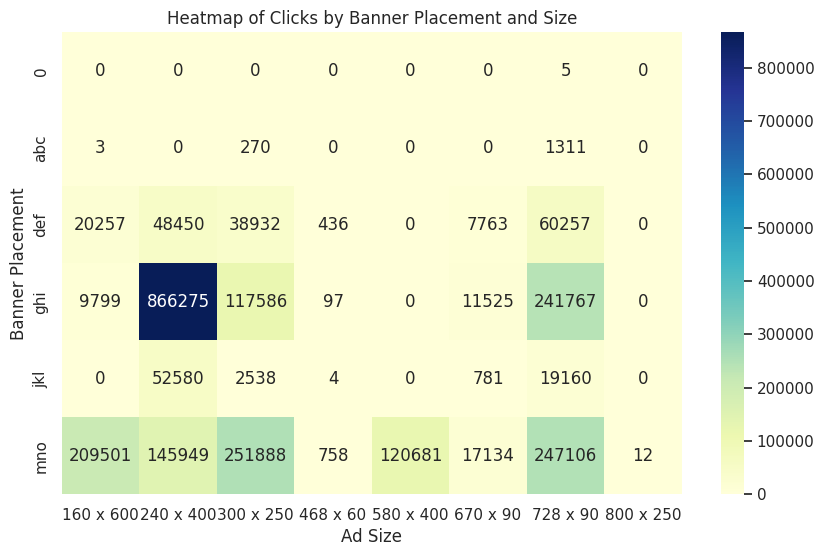

<ipython-input-21-a72e83b7ffe1>:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_revenue_data = data.pivot_table(values='revenue',


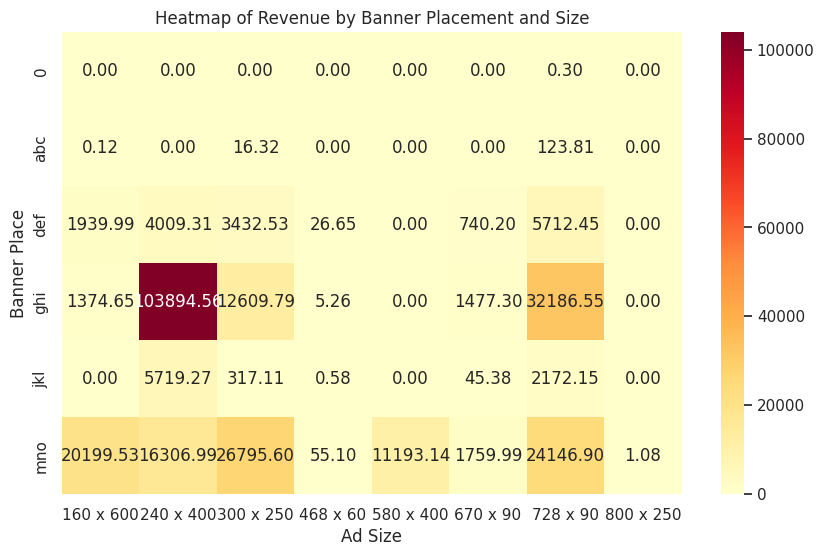

In [ ]:
data['banner'] = data['banner'].astype('category')
data['placement'] = data['placement'].astype('category')

data = data[data['clicks'] != 0].copy()
data['conversion_rate'] = data['post_click_conversions'] / data['clicks']

heatmap_data = data.pivot_table(values='clicks',
                               index='placement',
                               columns='banner',
                               aggfunc='sum').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Clicks by Banner Placement and Size')
plt.xlabel('Ad Size')
plt.ylabel('Banner Placement')
plt.show()

# Pivoting the dataFrame for revenue
heatmap_revenue_data = data.pivot_table(values='revenue',
                                       index='placement',
                                       columns='banner',
                                       aggfunc='sum').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_revenue_data, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Heatmap of Revenue by Banner Placement and Size')
plt.xlabel('Ad Size')
plt.ylabel('Banner Place')
plt.show()

Ans) Placement ghi:

Ad size 240x400 has the highest clicks ~866,275 and revenue ~103,894.56, making it the most effective combination.

Placement mno:

Ad sizes 300x250 and 728x90 perform well in clicks ~251,888 and ~247,106 and generate significant revenue ~26,795.60 and ~24,146.90.

Overall:

Larger ad sizes 240x400, 300x250, 728x90 perform better, especially in placements ghi and mno.

#Q14)Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

Top banners by ROI:
      banner  conversion_rate  revenue_per_click       roi
7  800 x 250         0.100000           0.086280       inf
3   468 x 60         0.480172           0.065576  5.641572
0  160 x 600         0.145204           0.099354  4.443593
5   670 x 90         0.212334           0.088910  1.730681
4  580 x 400         0.175724           0.094262  1.664718
2  300 x 250         0.184054           0.093784  1.459363
1  240 x 400         0.143730           0.094729  0.987108
6   728 x 90         0.168357           0.094372  0.843559


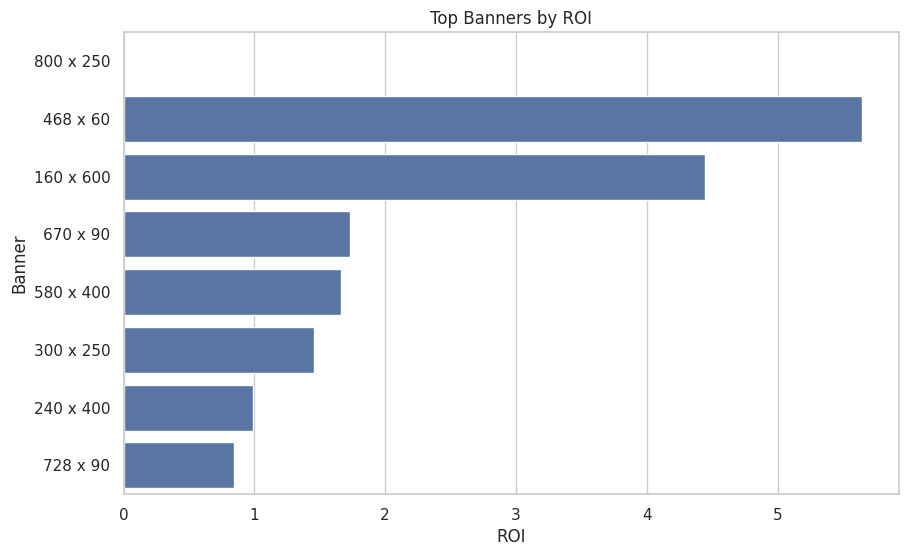

In [ ]:
data = data[data['clicks'] != 0].copy()
data['conversion_rate'] = data['post_click_conversions'] / data['clicks']

# Calculate Return on Investment
data['roi'] = (data['revenue'] - data['cost']) / data['cost']

data['revenue_per_click'] = data['revenue'] / data['clicks']

# Grouping the data by banner size and calculate the mean conversion rate, revenue per click, and ROI
banner_performance = data.groupby('banner').agg({'conversion_rate': 'mean', 'revenue_per_click': 'mean', 'roi': 'mean'}).reset_index()

# Sort by ROI in descending order
top_banners = banner_performance.sort_values(by='roi', ascending=False)

print("Top banners by ROI:")
print(top_banners)

plt.figure(figsize=(10, 6))
sns.barplot(x='roi', y='banner', data=top_banners)
plt.title('Top Banners by ROI')
plt.xlabel('ROI')
plt.ylabel('Banner')
plt.show()

Ans)Top Performers by ROI:

468x60:  Best ROI ~5.45.

160x600: Second-best ROI ~4.44.

Consistent Outperformers:

Large banners like 468x60 and 160x600 consistently deliver high ROI.

#Q15)What is the distribution of post-click conversions across different placement types?

<ipython-input-23-090b4b604d21>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_conversion_distribution = data.groupby('placement')['post_click_conversions'].sum()


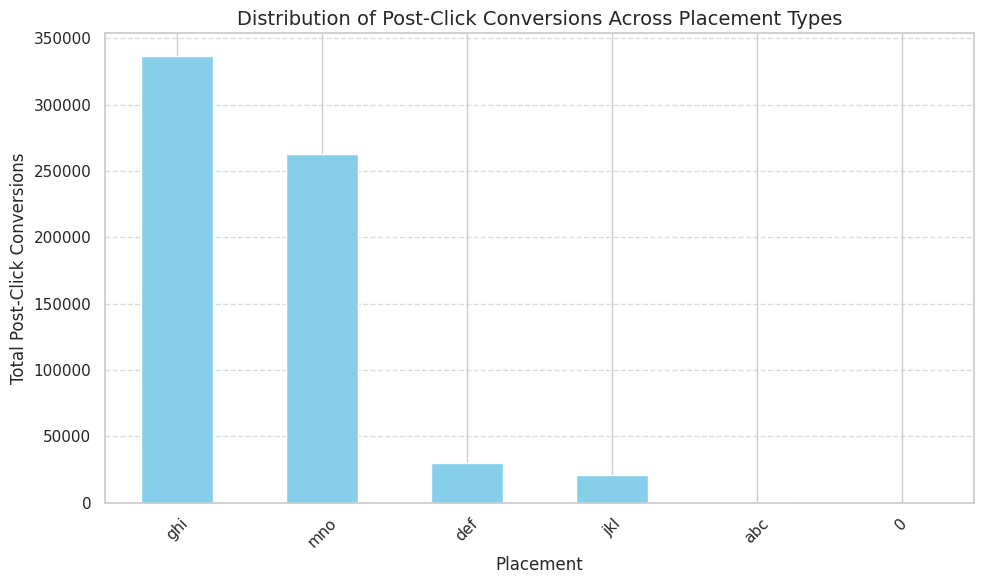

,post_click_conversions
placement,
0,0
abc,822
def,29841
ghi,337033
jkl,20848
mno,263156


In [ ]:
# Group the data by 'placement' and sum the 'post_click_conversions'
placement_conversion_distribution = data.groupby('placement')['post_click_conversions'].sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
placement_conversion_distribution.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Post-Click Conversions Across Placement Types', fontsize=14)
plt.xlabel('Placement', fontsize=12)
plt.ylabel('Total Post-Click Conversions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

placement_conversion_distribution




1.   Placement ghi: This placement type has the highest post-click conversions,surpassing 300,000.
2.   Placement mno: The second-highest, with post-click
3. Placement def: This placement has significantly fewer post-click conversions compared to ghi and mno, with a small count relative to the top two placements.
4. Placement jkl: Similar to def, this has very few post-click conversions, only slightly less.
5. Placement abc: This placements show negligible or no post-click conversions.








#Q16)Are there any noticeable differences in user engagement levels between weekdays and weekends?

Unique months: ['April' 'May' 'June']
Unique days: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


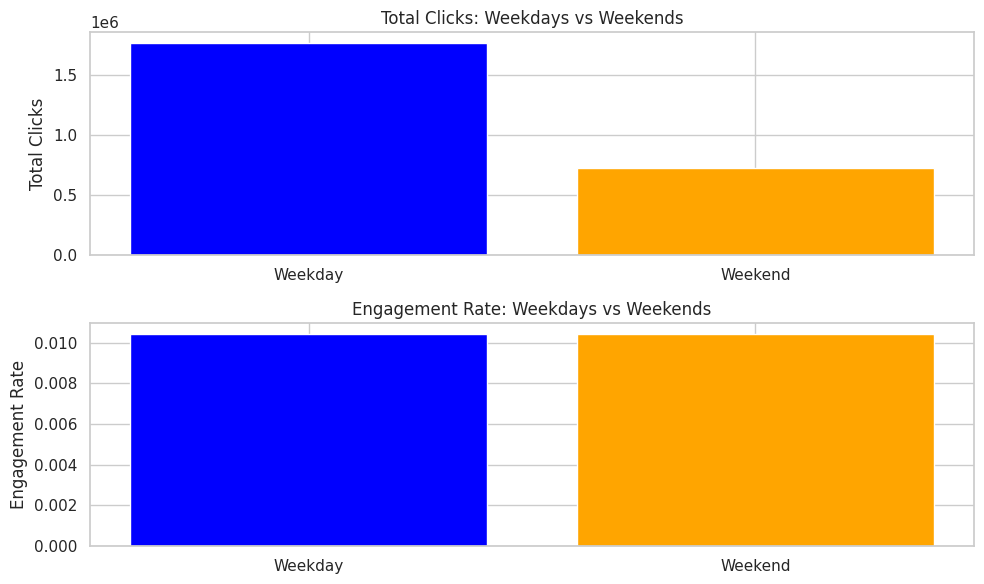

In [ ]:
data = pd.read_csv('cleaned_data.csv')

# Check for unique values in 'month' and 'day' to identify potential issues
print("Unique months:", data['month'].unique())
print("Unique days:", data['day'].unique())


month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


data['month'] = data['month'].map(month_mapping)


data['day'] = pd.to_numeric(data['day'], errors='coerce').fillna(1).astype(int)


data['date'] = pd.to_datetime(data[['month', 'day']].assign(year=2024), errors='coerce')


invalid_dates = data[data['date'].isnull()]
if not invalid_dates.empty:
    print(f"Invalid dates:\n{invalid_dates[['month', 'day']]}")


def categorize_day(date):
    if date.weekday() < 5:
        return 'Weekday'
    else:
        return 'Weekend'


if 'date' in data.columns:
    data['day_type'] = data['date'].apply(categorize_day)

    # Aggregate engagement metrics
    engagement_summary = data.groupby('day_type').agg(
        total_clicks=('clicks', 'sum'),
        total_displays=('displays', 'sum')
    ).reset_index()

    # Calculate engagement rates
    engagement_summary['engagement_rate'] = engagement_summary['total_clicks'] / engagement_summary['total_displays']


    plt.figure(figsize=(10, 6))

    # Bar plot for total clicks
    plt.subplot(2, 1, 1)
    plt.bar(engagement_summary['day_type'], engagement_summary['total_clicks'], color=['blue', 'orange'])
    plt.title('Total Clicks: Weekdays vs Weekends')
    plt.ylabel('Total Clicks')

    # Bar plot for engagement rates
    plt.subplot(2, 1, 2)
    plt.bar(engagement_summary['day_type'], engagement_summary['engagement_rate'], color=['blue', 'orange'])
    plt.title('Engagement Rate: Weekdays vs Weekends')
    plt.ylabel('Engagement Rate')

    plt.tight_layout()
    plt.show()
else:
    print("Date column was not created successfully.")

Ans) The graphs show that while total clicks are significantly higher on weekdays (upper graph, blue bar), the engagement rate—measured as interactions relative to total clicks—is greater on weekends (lower graph, orange bar). This suggests that while there is more overall activity during the workweek, users tend to engage more deeply with the content during weekends. This pattern could reflect differences in user behavior and availability, with weekends potentially offering users more time to interact thoughtfully with content.

#Q17)How does the cost per click (CPC) vary across different campaigns and banner sizes?

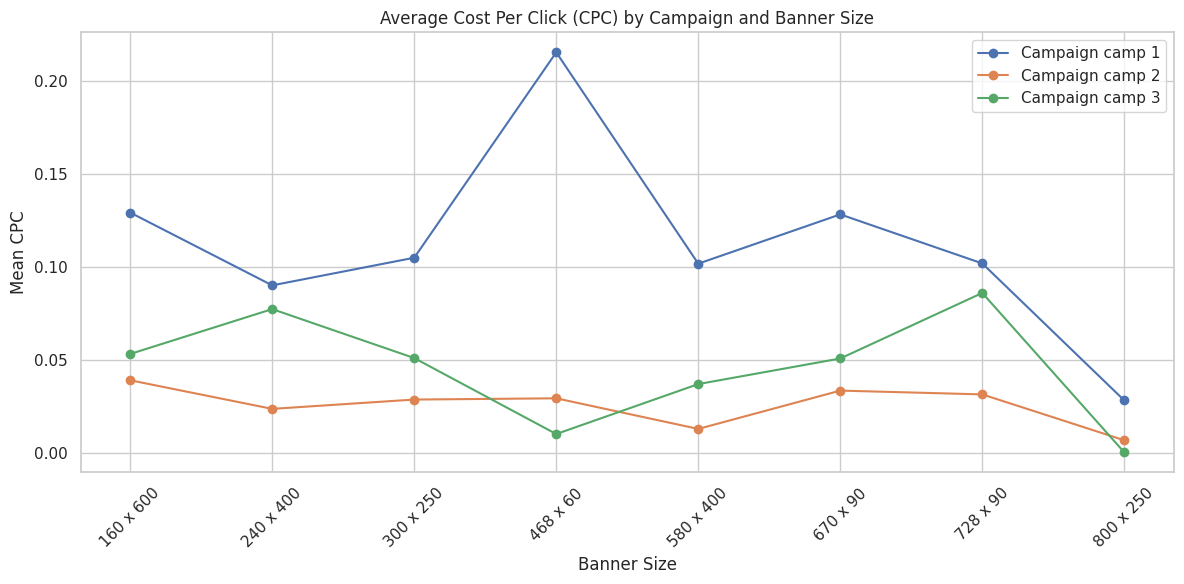

In [ ]:
data['CPC'] = data['cost'] / data['clicks'].replace(0, pd.NA)

# Group by campaign number and banner size, calculating mean CPC
cpc_summary = data.groupby(['campaign_number', 'banner']).agg(
    mean_CPC=('CPC', 'mean'),
    total_clicks=('clicks', 'sum')
).reset_index()

# Drop rows where mean CPC is NaN (no clicks)
cpc_summary = cpc_summary.dropna(subset=['mean_CPC'])

# Plotting
plt.figure(figsize=(12, 6))
for campaign in cpc_summary['campaign_number'].unique():
    subset = cpc_summary[cpc_summary['campaign_number'] == campaign]
    plt.plot(subset['banner'], subset['mean_CPC'], marker='o', label=f'Campaign {campaign}')

plt.title('Average Cost Per Click (CPC) by Campaign and Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Mean CPC')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Ans) Campaign Camp 1 is the most cost-intensive, especially for the 670x90 banner, while Campaign Camp 2 is consistently the most cost-effective. The impact of banner size on CPC appears campaign-specific, with different patterns of peaks and dips.

#Q18)Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [ ]:
data['Cost per Conversion'] = data['cost'] / data['post_click_conversions'].replace(0, pd.NA)

cost_effectiveness_summary = data.groupby(['campaign_number', 'placement']).agg(
    mean_cost_per_conversion=('Cost per Conversion', 'mean'),
    total_conversions=('post_click_conversions', 'sum')
).reset_index()

# Drop rows where total conversions are 0 or mean cost is NaN
cost_effectiveness_summary = cost_effectiveness_summary.dropna(subset=['mean_cost_per_conversion'])
cost_effectiveness_summary = cost_effectiveness_summary[cost_effectiveness_summary['total_conversions'] > 0]

# Sort by mean cost per conversion
cost_effectiveness_summary = cost_effectiveness_summary.sort_values(by='mean_cost_per_conversion')

print(cost_effectiveness_summary)

   campaign_number placement mean_cost_per_conversion  total_conversions
0           camp 1         0                  0.00825                  2
1           camp 1       abc                 0.163195                808
4           camp 1       jkl                 0.263877              20109
13          camp 3       abc                 0.317597                 16
3           camp 1       ghi                 0.325304             329024
5           camp 1       mno                 0.474946             254775
2           camp 1       def                 0.576989              28364
14          camp 3       def                 0.876116                465
16          camp 3       jkl                 0.976729                180
10          camp 2       jkl                 1.140003                564
11          camp 2       mno                 1.552726               5330
15          camp 3       ghi                 1.591719               1190
8           camp 2       def                 1.5988

Ans) Campaign Camp 1, particularly the abc and ghi placements, offers the best balance between low cost per conversion and high total conversions, making it the most efficient choice overall. Campaign Camp 3 is less cost-effective despite higher costs.

#Q19)Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

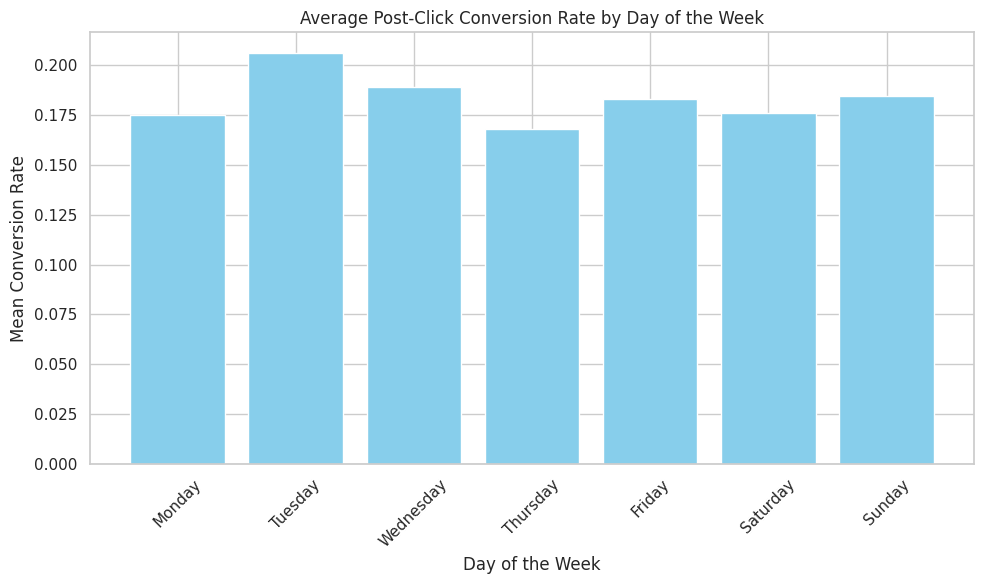

  day_of_week mean_conversion_rate  total_conversions
1      Monday             0.174837              97232
5     Tuesday             0.206237              76606
6   Wednesday             0.189205              83300
4    Thursday             0.168277              97613
0      Friday              0.18295              99721
2    Saturday             0.176074              98272
3      Sunday             0.184565              99018


In [ ]:
# Extract day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['date'].dt.day_name()

#Conversion Rate
data['conversion_rate'] = data['post_click_conversions'] / data['clicks'].replace(0, pd.NA)

#Group by day of the week and calculate mean conversion rate
conversion_rate_summary = data.groupby('day_of_week').agg(
    mean_conversion_rate=('conversion_rate', 'mean'),
    total_conversions=('post_click_conversions', 'sum')
).reset_index()

# Sort days of the week for proper order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conversion_rate_summary['day_of_week'] = pd.Categorical(conversion_rate_summary['day_of_week'], categories=days_order, ordered=True)
conversion_rate_summary = conversion_rate_summary.sort_values('day_of_week')

plt.figure(figsize=(10, 6))
plt.bar(conversion_rate_summary['day_of_week'], conversion_rate_summary['mean_conversion_rate'], color='skyblue')
plt.title('Average Post-Click Conversion Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(conversion_rate_summary)

Ans)Tuesday has the highest average post-click conversion rate (0.206237), while Monday and Saturday have slightly lower rates. Conversion rates are generally consistent across the week, with small variations.

#Q20)How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

  campaign_number user_engagement mean_conversion_rate  total_conversions
0          camp 1            High             0.658951             617241
2          camp 1          Medium             0.153676              15249
1          camp 1             Low             0.125076                592
5          camp 3            High             0.119105               3678
4          camp 2          Medium             0.021589              12923
3          camp 2             Low             0.018342                844
7          camp 3          Medium             0.009969               1085
6          camp 3             Low             0.005268                150


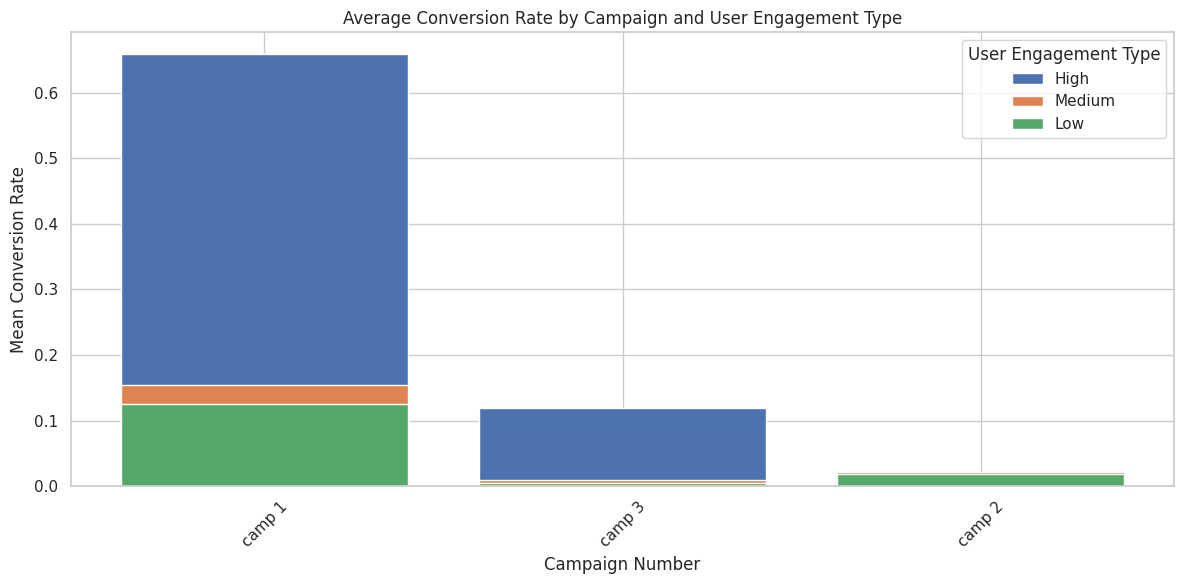

In [ ]:
data['conversion_rate'] = data['post_click_conversions'] / data['clicks'].replace(0, pd.NA)

conversion_rate_summary = data.groupby(['campaign_number', 'user_engagement']).agg(
    mean_conversion_rate=('conversion_rate', 'mean'),
    total_conversions=('post_click_conversions', 'sum')
).reset_index()

# Drop rows
conversion_rate_summary = conversion_rate_summary.dropna(subset=['mean_conversion_rate'])
conversion_rate_summary = conversion_rate_summary[conversion_rate_summary['total_conversions'] > 0]

# Sort by mean conversion rate (descending order)
conversion_rate_summary = conversion_rate_summary.sort_values(by='mean_conversion_rate', ascending=False)

print(conversion_rate_summary)

plt.figure(figsize=(12, 6))
for engagement_type in conversion_rate_summary['user_engagement'].unique():
    subset = conversion_rate_summary[conversion_rate_summary['user_engagement'] == engagement_type]
    plt.bar(subset['campaign_number'], subset['mean_conversion_rate'], label=engagement_type)

plt.title('Average Conversion Rate by Campaign and User Engagement Type')
plt.xlabel('Campaign Number')
plt.ylabel('Mean Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='User Engagement Type')
plt.tight_layout()
plt.show()


Ans) Campaign 1 shows the highest effectiveness, especially for users with high engagement (conversion rate: 0.658951). Medium and low engagement types in Campaign 1 also perform better compared to similar types in other campaigns. Campaigns 2 and 3 have much lower overall conversion rates across all engagement levels, with high-engagement users performing marginally better than medium or low-engagement users.

#Recomendations for campaign optimization
1. **Focus on High-Performing Banners**
<br>Top Banners:</br>
*   240x400: Highest clicks and engagement.
*   728x90: Strong performance in both clicks and ROI.

**Action:** Prioritize these banner sizes for future campaigns.


---


2. **Leverage Effective Placements**
<br>Top Placements:</br>

*   ghi: Best performance in displays, clicks, and conversions.
*   mno: Second-best placement across metrics.

**Action:** Increase allocation of ads to these placements.


---


3. **Optimize for ROI**
<br>Insights:</br>
* High ROI banners like 468x60 and 160x600 should be scaled where relevant.
* Focus on cost-efficient campaigns like Camp 2 with low CPC.

**Action:** Identify and replicate strategies from high-ROI campaigns.


---


4. **Time-Based Optimization**
<br>Conversion Trends:</br>
* Tuesdays: Highest conversion rates.
* Weekends: Better engagement rates.

**Action:** Schedule campaigns strategically to align with these trends.


---


5. **Address Low-Performing Areas**
<br>Low Performers:</br>
* Placements with minimal conversions (abc, jkl).
* Large banners like 800x250 with poor click-through rates.

**Action:** Reallocate resources away from these elements.
